In [1]:
import network as net
from mnist_loader import load_mnist_data, load_test_data, export_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split, KFold

Epoch 1 complete with accuracity 9514/10000 = 0.9514
8.958731174468994 seconds


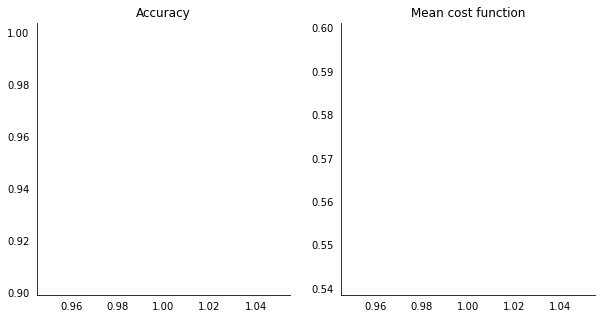

In [3]:
EPOCHS = 30
RS = None

train, valid, test = load_mnist_data()
# test = load_test_data("test.csv")

start = time.time()

netw = net.Network([784, 100, 10], random_state=RS)

acc, cf = netw.SGD(train, .5, EPOCHS, 10, 3.2, return_results=True, test_data=valid,
                                    monitor_train_evaluate=False)
print("%s seconds" % (time.time()-start))
net.visualisation(acc, cf, EPOCHS)
# net.visualisation(acc_t, cf_t, EPOCHS)

# netw.SGD(train, 2.714, 30, 30)
# export_data("last_ver.csv", netw.predict(test))

In [11]:
test[-1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     